In [1]:
import anndata
import os
import requests

save_path = "../../data/example_sce.h5ad"
# if not os.path.exists(save_path):
#     response = requests.get("https://go.wisc.edu/69435h")
#     with open(save_path, "wb") as f:
#         f.write(response.content)

example_sce = anndata.read_h5ad(save_path)
example_sce

AnnData object with n_obs × n_vars = 2087 × 100
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'cell_type', 'sizeFactor', 'pseudotime'
    var: 'highly_variable_genes'
    uns: 'X_name', 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    layers: 'counts', 'cpm', 'logcounts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

# PNMF

In [2]:
from scdesigner.experimental.classes.pnmf_regression import PNMFRegression
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_mtx from `annda

In [3]:
formula = "~ bs(pseudotime, degree=5)"
model = PNMFRegression()
params = model.estimate(example_sce, formula, epochs=200, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)
/Users/pyl/Desktop/UW Madison/Graduate/2025 Spring/sc project/scDesigner/scdesigner/src/scdesigner/experimental/classes/pnmf_regression.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


epoch:  0


In [4]:
params["W"] # index=gene?

0             1             2             3         4  \
0   4.228153e-08  2.162592e-04  6.600834e-09  2.055385e-05  0.000043   
1   3.852059e-09  1.010543e-01  3.755231e-10  4.151346e-03  0.000003   
2   1.462003e-09  3.469029e-03  7.008793e-09  4.863656e-04  0.018608   
3   3.927661e-08  1.269275e-01  3.131713e-09  2.213276e-04  0.013799   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000   
..           ...           ...           ...           ...       ...   
95  1.452790e-02  2.343872e-06  6.647532e-02  6.404326e-04  0.007573   
96  1.003195e-02  2.565817e-08  2.304054e-02  6.108648e-04  0.000010   
97  2.382607e-04  0.000000e+00  1.676093e-03  4.872162e-07  0.000000   
98  0.000000e+00  5.077982e-10  0.000000e+00  8.375817e-08  0.000000   
99  1.565166e-02  2.685379e-09  2.067324e-03  2.594449e-05  0.000152   

               5             6             7             8             9  \
0   2.161160e-04  1.748789e-07  2.434303e-04  4.647711e-05  2.601084e-09   
1   2.618219e-04  2.077421e-08  4.339064e-03  3.049874e-05  0.000000e+00   
2   4.320988e-04  5.797938e-01  1.539859e-02  1.734942e-04  1.128753e-05   
3   4.348765e-03  1.566979e-04  1.720915e-01  4.052248e-03  7.957437e-09   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..           ...           ...           ...           ...           ...   
95  4.085229e-05  1.024481e-01  1.575844e-04  7.957841e-05  6.840205e-03   
96  5.257639e-05  3.383284e-06  7.844868e-06  8.949735e-04  7.924974e-04   
97  3.216380e-06  0.000000e+00  3.901698e-10  7.969441e-06  2.346700e-08   
98  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
99  6.512009e-08  1.634180e-02  1.400542e-06  8.464506e-08  1.914805e-02   

              10            11            12            13            14  \
0   1.181446e-09  6.069106e-01  5.393330e-05  1.533296e-08  2.626263e-09   
1   0.000000e+00  1.151727e-03  6.404544e-07  7.759534e-09  0.000000e+00   
2   0.000000e+00  1.496060e-03  1.037969e-05  2.324155e-08  5.125605e-08   
3   4.372993e-10  2.726087e-01  4.599959e-05  1.384964e-06  0.000000e+00   
4   2.986933e-03  0.000000e+00  4.125875e-09  0.000000e+00  0.000000e+00   
..           ...           ...           ...           ...           ...   
95  6.566155e-04  3.167356e-06  1.153088e-03  2.315484e-04  6.273608e-02   
96  7.650894e-04  1.447451e-06  9.347136e-04  1.178163e-05  2.176070e-01   
97  2.493653e-02  0.000000e+00  5.862488e-04  1.012892e-05  1.350212e-06   
98  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
99  9.256837e-06  3.763251e-10  1.381969e-06  2.233843e-05  2.216401e-01   

              15            16            17        18        19  
0   7.370828e-03  9.782673e-06  9.003415e-09  0.000000  0.000101  
1   5.051736e-01  7.434930e-04  4.843446e-09  0.000000  0.000016  
2   2.251308e-04  1.222256e-06  0.000000e+00  0.000000  0.004696  
3   1.710939e-02  2.272422e-05  2.370643e-09  0.000000  0.005041  
4   0.000000e+00  1.842615e-09  4.846088e-01  0.000028  0.000000  
..           ...           ...           ...       ...       ...  
95  0.000000e+00  4.240299e-05  1.902021e-07  0.000860  0.017130  
96  4.749464e-09  8.694203e-03  8.183216e-06  0.095181  0.003759  
97  0.000000e+00  6.259365e-05  6.135813e-02  0.168381  0.000006  
98  1.036432e-01  3.339334e-08  0.000000e+00  0.000000  0.000000  
99  0.000000e+00  1.840918e-07  0.000000e+00  0.000057  0.001187  

[100 rows x 20 columns]

In [5]:
print(model)

scDesigner object with n_obs x n_vars = 2087 x 100
    method: 'PNMFRegression'
    formula: '~ bs(pseudotime, degree=5)'
    parameters: 'a', 'loc', 'beta', 'W'


In [6]:
model.predict(params, example_sce.obs, formula)["W"] # does predict need to return W?

0             1             2             3         4  \
0   4.228153e-08  2.162592e-04  6.600834e-09  2.055385e-05  0.000043   
1   3.852059e-09  1.010543e-01  3.755231e-10  4.151346e-03  0.000003   
2   1.462003e-09  3.469029e-03  7.008793e-09  4.863656e-04  0.018608   
3   3.927661e-08  1.269275e-01  3.131713e-09  2.213276e-04  0.013799   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000   
..           ...           ...           ...           ...       ...   
95  1.452790e-02  2.343872e-06  6.647532e-02  6.404326e-04  0.007573   
96  1.003195e-02  2.565817e-08  2.304054e-02  6.108648e-04  0.000010   
97  2.382607e-04  0.000000e+00  1.676093e-03  4.872162e-07  0.000000   
98  0.000000e+00  5.077982e-10  0.000000e+00  8.375817e-08  0.000000   
99  1.565166e-02  2.685379e-09  2.067324e-03  2.594449e-05  0.000152   

               5             6             7             8             9  \
0   2.161160e-04  1.748789e-07  2.434303e-04  4.647711e-05  2.601084e-09   
1   2.618219e-04  2.077421e-08  4.339064e-03  3.049874e-05  0.000000e+00   
2   4.320988e-04  5.797938e-01  1.539859e-02  1.734942e-04  1.128753e-05   
3   4.348765e-03  1.566979e-04  1.720915e-01  4.052248e-03  7.957437e-09   
4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
..           ...           ...           ...           ...           ...   
95  4.085229e-05  1.024481e-01  1.575844e-04  7.957841e-05  6.840205e-03   
96  5.257639e-05  3.383284e-06  7.844868e-06  8.949735e-04  7.924974e-04   
97  3.216380e-06  0.000000e+00  3.901698e-10  7.969441e-06  2.346700e-08   
98  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
99  6.512009e-08  1.634180e-02  1.400542e-06  8.464506e-08  1.914805e-02   

              10            11            12            13            14  \
0   1.181446e-09  6.069106e-01  5.393330e-05  1.533296e-08  2.626263e-09   
1   0.000000e+00  1.151727e-03  6.404544e-07  7.759534e-09  0.000000e+00   
2   0.000000e+00  1.496060e-03  1.037969e-05  2.324155e-08  5.125605e-08   
3   4.372993e-10  2.726087e-01  4.599959e-05  1.384964e-06  0.000000e+00   
4   2.986933e-03  0.000000e+00  4.125875e-09  0.000000e+00  0.000000e+00   
..           ...           ...           ...           ...           ...   
95  6.566155e-04  3.167356e-06  1.153088e-03  2.315484e-04  6.273608e-02   
96  7.650894e-04  1.447451e-06  9.347136e-04  1.178163e-05  2.176070e-01   
97  2.493653e-02  0.000000e+00  5.862488e-04  1.012892e-05  1.350212e-06   
98  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
99  9.256837e-06  3.763251e-10  1.381969e-06  2.233843e-05  2.216401e-01   

              15            16            17        18        19  
0   7.370828e-03  9.782673e-06  9.003415e-09  0.000000  0.000101  
1   5.051736e-01  7.434930e-04  4.843446e-09  0.000000  0.000016  
2   2.251308e-04  1.222256e-06  0.000000e+00  0.000000  0.004696  
3   1.710939e-02  2.272422e-05  2.370643e-09  0.000000  0.005041  
4   0.000000e+00  1.842615e-09  4.846088e-01  0.000028  0.000000  
..           ...           ...           ...       ...       ...  
95  0.000000e+00  4.240299e-05  1.902021e-07  0.000860  0.017130  
96  4.749464e-09  8.694203e-03  8.183216e-06  0.095181  0.003759  
97  0.000000e+00  6.259365e-05  6.135813e-02  0.168381  0.000006  
98  1.036432e-01  3.339334e-08  0.000000e+00  0.000000  0.000000  
99  0.000000e+00  1.840918e-07  0.000000e+00  0.000057  0.001187  

[100 rows x 20 columns]

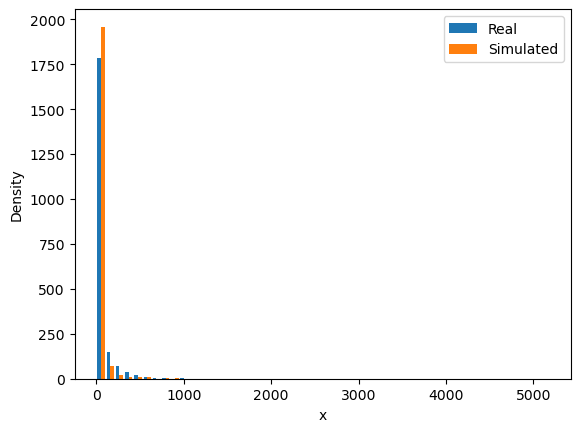

In [7]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula, 0.9)
plot_hist(sample.X, np.array(example_sce.X.todense()), 0) # sometimes simulates large outliers (like reads >10000)

In [8]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)

# NB Regression

In [9]:
from scdesigner.experimental.classes.nb_regression import NBRegression
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

In [10]:
formula = "~ bs(pseudotime, degree=5)"
model = NBRegression()
params = model.estimate(example_sce, formula, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [11]:
print(model)

scDesigner object with n_obs x n_vars = 2087 x 100
    method: 'NBRegression'
    formula: '~ bs(pseudotime, degree=5)'
    parameters: 'coefficient', 'dispersion'


In [12]:
model.predict(params, example_sce.obs, formula)["coefficient"]

Pyy       Iapp       Chgb       Rbp4       Spp1  \
AAACCTGAGAGGGATA  36.079803   7.558312  31.774660  18.356491   0.092897   
AAACCTGGTAAGTGGC   3.174667   0.261756   5.030446   0.832230   0.461349   
AAACGGGCAAAGAATC  53.349614  18.721642  37.241879  31.457126   0.127104   
AAACGGGGTACAGTTC  81.922243  75.922855  28.295586  50.965726   0.428164   
AAACGGGGTGAAATCA   1.691517   0.159875   2.870608   0.402359   1.008439   
...                     ...        ...        ...        ...        ...   
TTTGGTTTCACTTACT   0.555816   0.518190   0.634187   0.190472  39.823254   
TTTGGTTTCCTTTCGG  63.058429  29.793103  37.726732  39.420443   0.172488   
TTTGTCAAGAATGTGT  41.257814  10.093964  33.968011  22.072621   0.098933   
TTTGTCAAGTGACATA  18.362295   2.211684  20.656800   7.407429   0.100309   
TTTGTCAAGTGTGGCA   0.901721   0.113871   1.592608   0.201859   2.465378   

                       Chga        Cck       Ins1       Nnat       Ins2  ...  \
AAACCTGAGAGGGATA  27.899238   8.126648   0.535480   1.773518   0.155754  ...   
AAACCTGGTAAGTGGC   3.872603  18.294539   0.054656   0.470401   0.008775  ...   
AAACGGGCAAAGAATC  27.695299   5.321627   1.776515   3.673668   0.675626  ...   
AAACGGGGTACAGTTC  13.492893   2.078733  35.002543  31.624750  26.091725  ...   
AAACGGGGTGAAATCA   1.832046  17.964704   0.052026   0.430019   0.007989  ...   
...                     ...        ...        ...        ...        ...  ...   
TTTGGTTTCACTTACT   0.167322   5.033622   0.607705   0.906663   0.164032  ...   
TTTGGTTTCCTTTCGG  24.908643   4.090836   3.871988   6.094736   1.750010  ...   
TTTGTCAAGAATGTGT  28.537830   7.179519   0.756077   2.174348   0.237710  ...   
TTTGTCAAGTGACATA  20.032069  12.488960   0.166330   0.913820   0.036806  ...   
TTTGTCAAGTGTGGCA   0.801766  16.281401   0.058178   0.414100   0.008846  ...   

                    Nkx6-1     Fxyd3       Hn1   Smarcd2      Pdia6     Ffar2  \
AAACCTGAGAGGGATA  3.454827  2.814100  1.706142  0.680509   1.362609  2.763675   
AAACCTGGTAAGTGGC  4.110610  2.987368  5.144456  3.426295   1.012415  2.922402   
AAACGGGCAAAGAATC  3.379190  2.355397  1.418012  0.467466   2.251876  2.178235   
AAACGGGGTACAGTTC  4.967409  1.523722  1.605362  0.370364  10.023693  1.012252   
AAACGGGGTGAAATCA  3.940214  2.540900  6.192575  4.334168   1.237103  2.557246   
...                    ...       ...       ...       ...        ...       ...   
TTTGGTTTCACTTACT  1.618279  0.677714  4.879602  2.298521   3.859873  0.785814   
TTTGGTTTCCTTTCGG  3.474321  2.101575  1.352631  0.399248   3.238529  1.821720   
TTTGTCAAGAATGTGT  3.407575  2.674735  1.592940  0.599806   1.560370  2.595241   
TTTGTCAAGTGACATA  3.765359  3.274858  2.433517  1.206912   0.941273  3.242814   
TTTGTCAAGTGTGGCA  3.581280  2.005186  7.062129  5.045635   1.617671  2.130811   

                      Hes6  Serpinh1       Npy  1110012L19Rik  
AAACCTGAGAGGGATA  1.271297  0.493841  0.007896       1.255089  
AAACCTGGTAAGTGGC  3.535536  1.921493  0.003070       3.572731  
AAACGGGCAAAGAATC  1.199819  0.428482  0.018672       0.646228  
AAACGGGGTACAGTTC  1.195616  0.647248  1.268672       0.321665  
AAACGGGGTGAAATCA  4.645780  2.634826  0.003232       2.942625  
...                    ...       ...       ...            ...  
TTTGGTTTCACTTACT  3.379524  5.556862  0.021012       0.369905  
TTTGGTTTCCTTTCGG  1.210173  0.429353  0.038513       0.450040  
TTTGTCAAGAATGTGT  1.234562  0.464632  0.009848       1.027332  
TTTGTCAAGTGACATA  1.601084  0.716748  0.004289       2.500975  
TTTGTCAAGTGTGGCA  5.896523  3.532660  0.003690       2.079854  

[2087 rows x 100 columns]

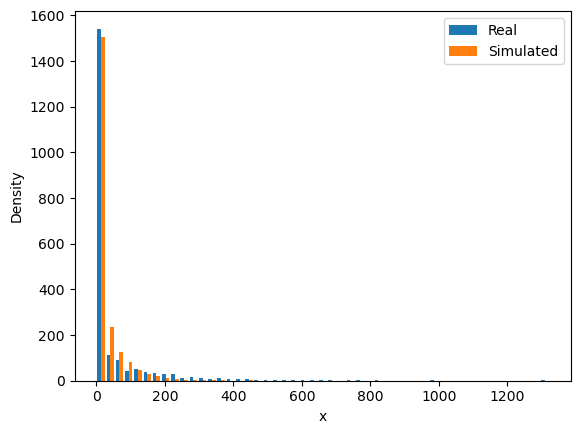

In [13]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 0)

In [14]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)

# NB Copula

In [15]:
from scdesigner.experimental.classes.nb_copula import NBCopula
from scdesigner.experimental.diagnose.plot import plot_hist, plot_umap

In [16]:
formula = "~ bs(pseudotime, degree=5)"
model = NBCopula()
params = model.estimate(example_sce, formula, epochs=50, lr=0.1)

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/storage.py:39: ImplicitModificationWarning: X should not be a np.matrix, use np.ndarray instead.
  warnings.warn(msg, ImplicitModificationWarning)


In [17]:
print(model)

scDesigner object with n_obs x n_vars = 2087 x 100
    method: 'NBCopula'
    formula: '~ bs(pseudotime, degree=5)'
    copula formula: '~ 1'
    parameters: 'coefficient', 'dispersion', 'covariance'


In [18]:
model.predict(params, example_sce.obs, formula)["covariance"] # what to return? (especially when copula formula is not ~1?)

{'Intercept':                     Pyy      Iapp      Chgb      Rbp4      Spp1      Chga  \
 Pyy            1.955124  0.497418 -0.432671  0.789363 -0.259420  0.048084   
 Iapp           0.497418  1.577999 -0.163433  0.488911 -0.575354  0.434387   
 Chgb          -0.432671 -0.163433  1.283735 -0.213409  0.081500  0.255454   
 Rbp4           0.789363  0.488911 -0.213409  1.594468 -0.432347  0.258674   
 Spp1          -0.259420 -0.575354  0.081500 -0.432347  0.858308 -0.249555   
 ...                 ...       ...       ...       ...       ...       ...   
 Ffar2          0.042985  0.036949  0.123529 -0.009880  0.016091  0.122580   
 Hes6          -0.031609 -0.085572  0.076572 -0.129618  0.141614 -0.011404   
 Serpinh1       0.002190 -0.173750 -0.014244 -0.149435  0.195031 -0.137636   
 Npy           -0.118171 -0.112421  0.222822  0.244480 -0.077812  0.069730   
 1110012L19Rik  0.127698  0.009358 -0.045927  0.023842  0.055072  0.020553   
 
                     Cck      Ins1      Nnat     

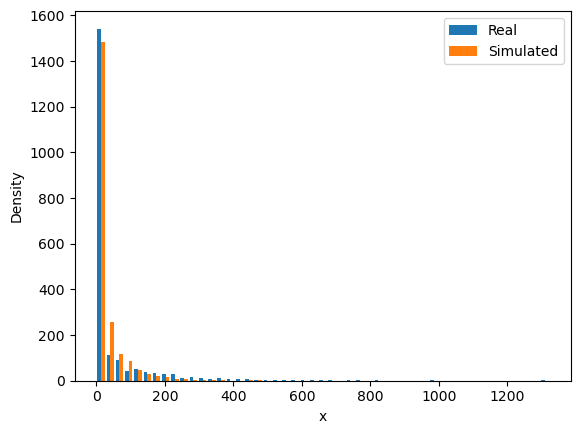

In [19]:
import numpy as np
sample = model.sample(params, example_sce.obs, formula)
plot_hist(sample.X, np.array(example_sce.X.todense()), 0)

In [20]:
combined = anndata.concat({"real": example_sce, "sim": sample}, label="source")
plot_umap(combined, color="pseudotime", facet="source")

/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/pyl/anaconda3/envs/sc2/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


alt.FacetChart(...)